# Building a single tree

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df_soybean = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data',header=None)

307 cases, 35 variables (observation on plants with some climatic variables) and 19 classes (soybean diseases)

Attribute Information:

1. date: april,may,june,july,august,september,october,?.
2. plant-stand: normal,lt-normal,?.
3. precip: lt-norm,norm,gt-norm,?.
4. temp: lt-norm,norm,gt-norm,?.
5. hail: yes,no,?.
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs,
same-lst-sev-yrs,?.
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?.
8. severity: minor,pot-severe,severe,?.
9. seed-tmt: none,fungicide,other,?.
10. germination: 90-100%,80-89%,lt-80%,?.
11. plant-growth: norm,abnorm,?.
12. leaves: norm,abnorm.
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?.
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?.
15. leafspot-size: lt-1/8,gt-1/8,dna,?.
16. leaf-shread: absent,present,?.
17. leaf-malf: absent,present,?.
18. leaf-mild: absent,upper-surf,lower-surf,?.
19. stem: norm,abnorm,?.
20. lodging: yes,no,?.
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?.
22. canker-lesion: dna,brown,dk-brown-blk,tan,?.
23. fruiting-bodies: absent,present,?.
24. external decay: absent,firm-and-dry,watery,?.
25. mycelium: absent,present,?.
26. int-discolor: none,brown,black,?.
27. sclerotia: absent,present,?.
28. fruit-pods: norm,diseased,few-present,dna,?.
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?.
30. seed: norm,abnorm,?.
31. mold-growth: absent,present,?.
32. seed-discolor: absent,present,?.
33. seed-size: norm,lt-norm,?.
34. shriveling: absent,present,?.
35. roots: norm,rotted,galls-cysts,?.

[https://archive.ics.uci.edu/ml/datasets/soybean+(small)]

### Replace all "?" in table with NaN which will be replaced by the rounded column mean after each train-test split

In [38]:
df_to_use= df_soybean
df_to_use = df_to_use.replace('?', np.NaN)
df_to_use

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
5,diaporthe-stem-canker,5,0,2,1,0,3,0,1,0,...,0,0,0,4,0,0,0,0,0,0
6,diaporthe-stem-canker,5,0,2,1,0,2,0,1,1,...,0,0,0,4,0,0,0,0,0,0
7,diaporthe-stem-canker,4,0,2,1,1,1,0,1,0,...,0,0,0,4,0,0,0,0,0,0
8,diaporthe-stem-canker,6,0,2,1,0,3,0,1,1,...,0,0,0,4,0,0,0,0,0,0
9,diaporthe-stem-canker,4,0,2,1,0,2,0,2,0,...,0,0,0,4,0,0,0,0,0,0


In [54]:
replace_after_split = False

In [55]:
if !replace_after_split:
    for i in range(1,36):
         df_to_use[i] = df_to_use[i].fillna(round(df_to_use[i].dropna().astype(float).mean(),0))

SyntaxError: invalid syntax (<ipython-input-55-84d685dfe77b>, line 1)

In [40]:
### Y is the category column and X is the matrix with all other columns
X = df_to_use.values[:, 1:36]
Y = df_to_use.values[:,0]#.astype('category')

In [41]:
### Viewing the Classification Column mapped to values
df_to_use.iloc[0]

0     diaporthe-stem-canker
1                         6
2                         0
3                         2
4                         1
5                         0
6                         1
7                         1
8                         1
9                         0
10                        0
11                        1
12                        1
13                        0
14                        2
15                        2
16                        0
17                        0
18                        0
19                        1
20                        1
21                        3
22                        1
23                        1
24                        1
25                        0
26                        0
27                        0
28                        0
29                        4
30                        0
31                        0
32                        0
33                        0
34                        0
35                  

In [42]:
### Number of unique classes (Y values)
#df_to_use.values[:,0].unique()
print(len(df_to_use[0].unique()))
df_to_use[0].unique()

19


array(['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot',
       'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew',
       'downy-mildew', 'brown-spot', 'bacterial-blight',
       'bacterial-pustule', 'purple-seed-stain', 'anthracnose',
       'phyllosticta-leaf-spot', 'alternarialeaf-spot',
       'frog-eye-leaf-spot', 'diaporthe-pod-&-stem-blight',
       'cyst-nematode', '2-4-d-injury', 'herbicide-injury'], dtype=object)

In [43]:
X

array([['6', '0', '2', ..., '0', '0', '0'],
       ['4', '0', '2', ..., '0', '0', '0'],
       ['3', '0', '2', ..., '0', '0', '0'],
       ...,
       ['0', '1', nan, ..., nan, nan, '1'],
       ['1', '1', nan, ..., nan, nan, '1'],
       ['1', '1', nan, ..., nan, nan, '1']], dtype=object)

In [44]:
i_max = 100 # length of matrix (number repeats)
j_max = 50 # width of matrix (bootstrap replicates)

In [45]:
# err_0 is the base (without bagging)
cases = len(df_to_use)
err_0 = np.zeros((i_max,1)) #ToDo just confirm
for i in range(i_max):
    
    for j in range(1):
        print(i, j, end="\r")
        df_to_use_sample = df_to_use
        X = df_to_use_sample.values[:, 1:35]
        Y = df_to_use_sample.values[:, 0]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with rounded mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        col_means = np.nanmean(X_train, axis=0)
        inds = np.where(np.isnan(X_train))
        X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        col_means = np.round(np.nanmean(X_test, axis=0))
        inds = np.where(np.isnan(X_test))
        X_test[inds] = np.take(col_means, inds[1])
        
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err_0[i,j] = err_0[i,j] + 1
        err_0[i,j]= err_0[i,j]/len(y_test)

In [46]:
### Viewing the base
err_0

array([[0.17204301],
       [0.13978495],
       [0.20430108],
       [0.20430108],
       [0.16129032],
       [0.12903226],
       [0.20430108],
       [0.16129032],
       [0.19354839],
       [0.22580645],
       [0.24731183],
       [0.13978495],
       [0.19354839],
       [0.20430108],
       [0.11827957],
       [0.07526882],
       [0.29032258],
       [0.13978495],
       [0.17204301],
       [0.21505376],
       [0.23655914],
       [0.15053763],
       [0.12903226],
       [0.21505376],
       [0.19354839],
       [0.21505376],
       [0.22580645],
       [0.11827957],
       [0.17204301],
       [0.15053763],
       [0.13978495],
       [0.17204301],
       [0.31182796],
       [0.13978495],
       [0.15053763],
       [0.20430108],
       [0.15053763],
       [0.1827957 ],
       [0.10752688],
       [0.12903226],
       [0.17204301],
       [0.13978495],
       [0.17204301],
       [0.10752688],
       [0.10752688],
       [0.1827957 ],
       [0.17204301],
       [0.182

In [47]:
# err is the method in the paper with bagging
cases = len(df_to_use)
err = np.zeros((i_max,j_max))
for i in range(i_max):
    
    for j in range(j_max):
        print(i, j, end="\r")
        df_to_use_sample = df_to_use.sample(n=cases, replace=True)
        X = df_to_use_sample.values[:, 1:35]
        Y = df_to_use_sample.values[:, 0]#.astype('category')
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test
        X_train = X_train.astype(float)
        X_test = X_test.astype(float)
        # replace missing values with mean (after train/test split)
        # https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns
        col_means = np.nanmean(X_train, axis=0)
        inds = np.where(np.isnan(X_train))
        X_train[inds] = np.take(col_means, inds[1])
        ### Rounding, because all values are categorical, not numerical
        col_means = np.round(np.nanmean(X_test, axis=0))
        inds = np.where(np.isnan(X_test))
        X_test[inds] = np.take(col_means, inds[1])
        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier()
        # Train Decision Tree Classifer
        clf = clf.fit(X_train,y_train)
        #Predict the response for test dataset
        y_pred = clf.predict(X_test)
        for k in range(0,len(y_test)-1):
            if y_test[k] != y_pred[k]:
                err[i,j] = err[i,j] + 1
        err[i,j]= err[i,j]/len(y_test)

In [48]:
### Viewing err
err

array([[0.17204301, 0.17204301, 0.15053763, ..., 0.12903226, 0.25806452,
        0.17204301],
       [0.07526882, 0.16129032, 0.23655914, ..., 0.13978495, 0.16129032,
        0.08602151],
       [0.11827957, 0.23655914, 0.09677419, ..., 0.04301075, 0.11827957,
        0.09677419],
       ...,
       [0.09677419, 0.16129032, 0.16129032, ..., 0.10752688, 0.16129032,
        0.09677419],
       [0.16129032, 0.11827957, 0.1827957 , ..., 0.12903226, 0.16129032,
        0.22580645],
       [0.15053763, 0.11827957, 0.1827957 , ..., 0.08602151, 0.11827957,
        0.15053763]])

The paper found 14% for err0 and 10% for err, which is the improvement from bagging

0.18000000000000008


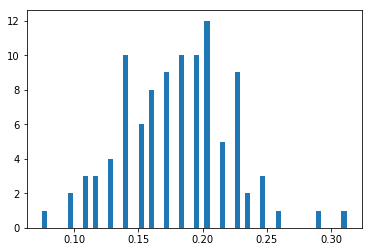

In [49]:
print(err_0.mean())
plt.hist(err_0, bins = 60)
plt.show()

0.13733978494623658


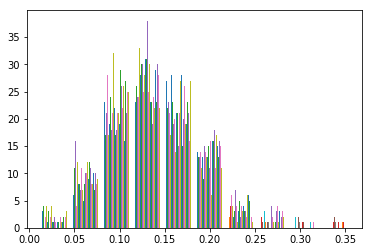

In [50]:
print(err.mean())
import matplotlib.pyplot as plt
plt.hist(err)
plt.show()

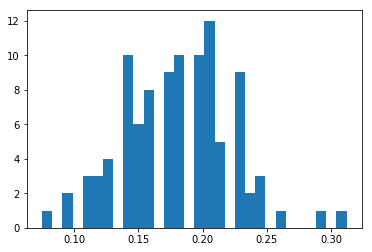

In [51]:
plt.hist(np.concatenate(err_0), bins = 30)
plt.show()

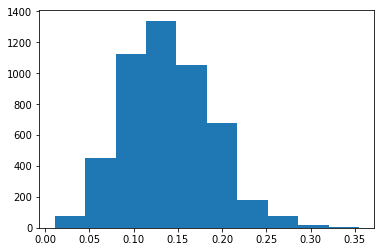

In [52]:
plt.hist(np.concatenate(err))
plt.show()

/Users/francescoetzer/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


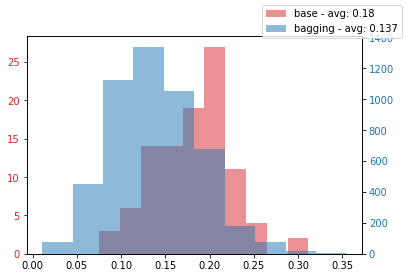

In [53]:
fig, ax1 = plt.subplots()
ax1.hist(np.concatenate(err_0), color='tab:red', alpha=0.5, label='base - avg: {}'.format(round(err_0.mean(), 3)))
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.hist(np.concatenate(err),alpha=0.5, label='bagging - avg: {}'.format(round(err.mean(), 3)))
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.legend(loc='upper right')
fig.show()